In [63]:
!pip install pandas
!pip install spacy==3.2.4
!pip install plac
!python -m spacy download pt_core_news_md

     |████████████████████████████████| 51.5 MB 97 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_md')


In [64]:
from __future__ import unicode_literals, print_function
import plac
import random
from pathlib import Path
import spacy
from tqdm import tqdm

In [65]:
!wget  https://www.dropbox.com/s/sukruo2u3tiq5fr/punct-data.zip?dl=1  -O punct_data.zip

--2022-05-23 12:06:53--  https://www.dropbox.com/s/sukruo2u3tiq5fr/punct-data.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/sukruo2u3tiq5fr/punct-data.zip [following]
--2022-05-23 12:06:54--  https://www.dropbox.com/s/dl/sukruo2u3tiq5fr/punct-data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0a76605a45a50a1edcab8e9395.dl.dropboxusercontent.com/cd/0/get/Bl10GCknC_CGjzv0eDLFI5ah9Bmk93n25T_RwHGG4jUu-hJYVvcWhdUde1z0p-tZKIBidPMIZSfEMVCEghOB7SqlyebrrIpH-RAT_WhoRwtwINIIKDfphjcVIx8ZkumxmRZgdTqNPschkYItODkTVZaE1oU_lRL2EoeMidYBpTQXXMR-DfTjWXreh8i0W_EvhrQ/file?dl=1# [following]
--2022-05-23 12:06:54--  https://uc0a76605a45a50a1edcab8e9395.dl.dropboxusercontent.com/cd/0/get/Bl10GCknC_CGjzv0eDLFI5ah9Bmk93n25T_RwHG

In [66]:
!rm -r punct-data/

In [67]:
!unzip punct_data.zip

Archive:  punct_data.zip
   creating: punct-data/
  inflating: punct-data/test.csv     
  inflating: punct-data/train.csv    
  inflating: punct-data/val.csv      


In [68]:
from collections import Counter
import pandas as pd
import re 
from collections import defaultdict
from spacy.matcher import Matcher
from spacy.tokens import Span
from tqdm import tqdm
import spacy

In [69]:
nlp = spacy.blank('pt')

In [70]:
def preprocess_data(dataframe):
     

    TOTAL = len(list(dataframe.groupby("sentence_id")))
    data = []
    for _, group in tqdm(dataframe.groupby("sentence_id"), total=TOTAL):
        text = " ".join(group.words)
        doc = nlp.make_doc(text)
        ents = []
        count_dict = defaultdict(lambda : 0)
        for i, label in enumerate(group.labels):
            if label != "O":
                matching_word = group.words.tolist()[i]
                span = Span(doc, i, i+1, label=label)
                ents.append((span.start_char, span.end_char, label.replace('I-','')))
                count_dict[matching_word] += 1
        ent = (text, {
            'entities': ents
        })
        data.append(ent)
    return data

In [71]:
import pickle

import pickle
train_df = pd.read_csv('./punct-data/train.csv').dropna()
TRAIN_DATA = preprocess_data(train_df)


with open('train.pickle', 'wb') as handle:
    pickle.dump(TRAIN_DATA, handle, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 4101/4101 [00:02<00:00, 1367.38it/s]


In [72]:
with open('train.pickle', 'rb') as handle:
    TRAIN_DATA = pickle.load(handle)
TRAIN_DATA[:1]

[('Filmado na cidade de Nova York Exibido pela primeira vez no TED2018 Sou um imigrante da Uganda vivendo nos Estados Unidos enquanto espero a aprovação do meu pedido de asilo',
  {'entities': [(167, 172, 'PERIOD')]})]

In [73]:
train_df.loc[train_df['sentence_id']==0,]

,sentence_id,labels,words
0,0,O,Filmado
1,0,O,na
2,0,O,cidade
3,0,O,de
4,0,O,Nova
5,0,O,York
6,0,O,Exibido
7,0,O,pela
8,0,O,primeira
9,0,O,vez


In [74]:
TRAIN_DATA[2:3]

[('Mas também demonstra o que costuma faltar no debate global sobre refugiados migrantes e imigrantes as vozes daqueles desfavorecidos Os cidadãos de muitos países anfitriões até mesmo daqueles que acolhiam os recém chegados estão preocupados com o aumento do número de indivíduos chegando aos seus países A primeira crítica é que os recém chegados prejudicam a estabilidade do bem estar social e dos níveis de emprego em seus países Cidadãos inseguros e céticos olham para os políticos que competem entre si para ver quem ganha o prêmio de voz mais alta do populismo e do nacionalismo É uma competição entre quem é o mais duro com os migrantes quem é mais propenso a impor proibições de viagem e quem é o mais ansioso em propor projetos de construção de muros',
  {'entities': [(65, 75, 'COMMA'),
    (88, 98, 'COMMA'),
    (117, 131, 'PERIOD'),
    (161, 171, 'COMMA'),
    (213, 221, 'COMMA'),
    (296, 302, 'PERIOD'),
    (424, 430, 'PERIOD'),
    (570, 582, 'PERIOD'),
    (632, 641, 'COMMA'),


In [75]:
TRAIN_DATA[:1]

[('Filmado na cidade de Nova York Exibido pela primeira vez no TED2018 Sou um imigrante da Uganda vivendo nos Estados Unidos enquanto espero a aprovação do meu pedido de asilo',
  {'entities': [(167, 172, 'PERIOD')]})]

In [115]:
from spacy.tokens import Doc
from spacy.training import Example
from tqdm.notebook import trange
#import spacy_transformers
import numpy as np

def train_spacy(data, iterations=10, model="pt_core_news_md"):
    TRAIN_DATA = data

    # nlp = spacy.blank("en")  # start with a blank model

    if model is not None:
      nlp = spacy.load(model)
      print("Loaded model '%s'" % model)
      ner = nlp.get_pipe('ner')
    else:
        nlp = spacy.blank('pt')  
       
        nlp.add_pipe('ner', last=True)
        ner = nlp.get_pipe('ner')
        ner.add_label('O')
        print("Created blank 'pt' model")

    #set up the pipeline
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    print(ner.labels)
    # Init loss
    losses = []

    # Init and configure optimizer
    optimizer = nlp.create_optimizer()
    optimizer.learn_rate = 0.001  # Change to some lr you prefers
    batch_size = 32  # Choose batch size you prefers

    for itn in trange(iterations):
       
        random.shuffle(TRAIN_DATA)
        

        # Batch the examples and iterate over them
        for batch in spacy.util.minibatch(TRAIN_DATA, size=batch_size):
            # Create Example instance for each training example in mini batch
            #print(annotations)
            examples = [Example.from_dict(nlp.make_doc(text), annotations) for text, annotations in batch]
            # Update model with mini batch
            
            loss = nlp.update(examples, drop=0.2, sgd=optimizer)
            losses.append(loss['ner'])

    y = np.array(losses)        
    x = np.arange(0, iterations)
    sns.lineplot(x, y)   

    return nlp,losses

In [116]:
nlp, losses = train_spacy(TRAIN_DATA, iterations=15, model='pt_core_news_lg')

Loaded model 'pt_core_news_md'
('COMMA', 'LOC', 'MISC', 'ORG', 'PER', 'PERIOD', 'QUESTION')


  0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


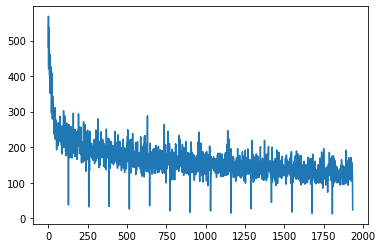

In [120]:
import seaborn as sns

ner_loss = [loss['ner'] for loss in losses]
y = np.array(ner_loss)
x = np.arange(0, len(ner_loss))
sns.lineplot(x, y)

In [121]:
test_df = pd.read_csv('./punct-data/test.csv').dropna()
label2dict = {"COMMA":",","PERIOD": ".", "QUESTION":"?"}
TOTAL = len(list(test_df.groupby("sentence_id")))

TEST_DATA = preprocess_data(test_df)

100%|██████████| 1282/1282 [00:00<00:00, 1353.27it/s]


In [122]:

examples = []
for text, entities in TEST_DATA:
    doc = nlp(text)
    
    example = Example.from_dict(doc, entities)
    examples.append(example)
    
   

In [134]:
from spacy.scorer import Scorer
scorer = Scorer()
scores = Scorer.score_spans(examples, "ents")
print(scores["ents_f"])

0.7120850250776212


In [135]:
result_df = pd.DataFrame(scores['ents_per_type'])
result_df

,QUESTION,PERIOD,COMMA
p,0.500000,0.913547,0.667206
r,0.004878,0.957049,0.512334
f,0.009662,0.934793,0.579602


In [136]:
open('latex.txt', 'w').write(result_df.to_latex())

231

In [133]:
!zip pt_core_news_md_ner.zip -r ner 

  adding: ner/ (stored 0%)
  adding: ner/config.cfg (deflated 73%)
  adding: ner/meta.json (deflated 87%)
  adding: ner/tokenizer (deflated 84%)
  adding: ner/parser/ (stored 0%)
  adding: ner/parser/model (deflated 7%)
  adding: ner/parser/cfg (deflated 32%)
  adding: ner/parser/moves (deflated 52%)
  adding: ner/attribute_ruler/ (stored 0%)
  adding: ner/attribute_ruler/patterns (deflated 75%)
  adding: ner/lemmatizer/ (stored 0%)
  adding: ner/lemmatizer/lookups/ (stored 0%)
  adding: ner/lemmatizer/lookups/lookups.bin (deflated 47%)
  adding: ner/vocab/ (stored 0%)
  adding: ner/vocab/vectors (deflated 9%)
  adding: ner/vocab/lookups.bin (stored 0%)
  adding: ner/vocab/vectors.cfg (stored 0%)
  adding: ner/vocab/strings.json (deflated 79%)
  adding: ner/vocab/key2row (deflated 7%)
  adding: ner/morphologizer/ (stored 0%)
  adding: ner/morphologizer/model (deflated 7%)
  adding: ner/morphologizer/cfg (deflated 92%)
  adding: ner/tok2vec/ (stored 0%)
  adding: ner/tok2vec/model (defl

In [ ]:
scores

In [131]:
output_dir = 'ner'
if output_dir is not None:
    output_dir = Path(output_dir)
    if not output_dir.exists():
        output_dir.mkdir()
    nlp.to_disk(output_dir)
    print("Saved model to", output_dir)

Saved model to ner
